# Problem

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [3]:
#Importing Required Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Training Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [5]:
#Visualizing first 5 rows of dataset
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Total charges is numercial but still we got it as Object, let us check the data

In [9]:
#Setting CustomerID as index
df.set_index('customerID',inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Checking Null Values & Treating Them

In [10]:
#Checking Null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:ylabel='customerID'>

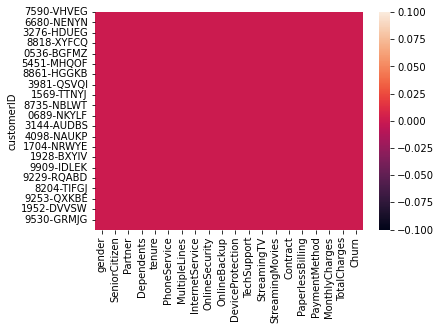

In [11]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

There are no Null Values in our dataset. Hence, we can proceed forward with visualizing our data.

# Making DataFrame for the Nominal Data

In [12]:
#Copying nominal variables into a new dataframe
df_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']].copy()

In [13]:
#Checking columns of new nominal dataframe created
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [14]:
#Checking shape of nominal data
df_nominal.shape

(7043, 17)

# data visualization

For the nominal categorical data we will use countplot as it will gives frequency of the columns.

In [15]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

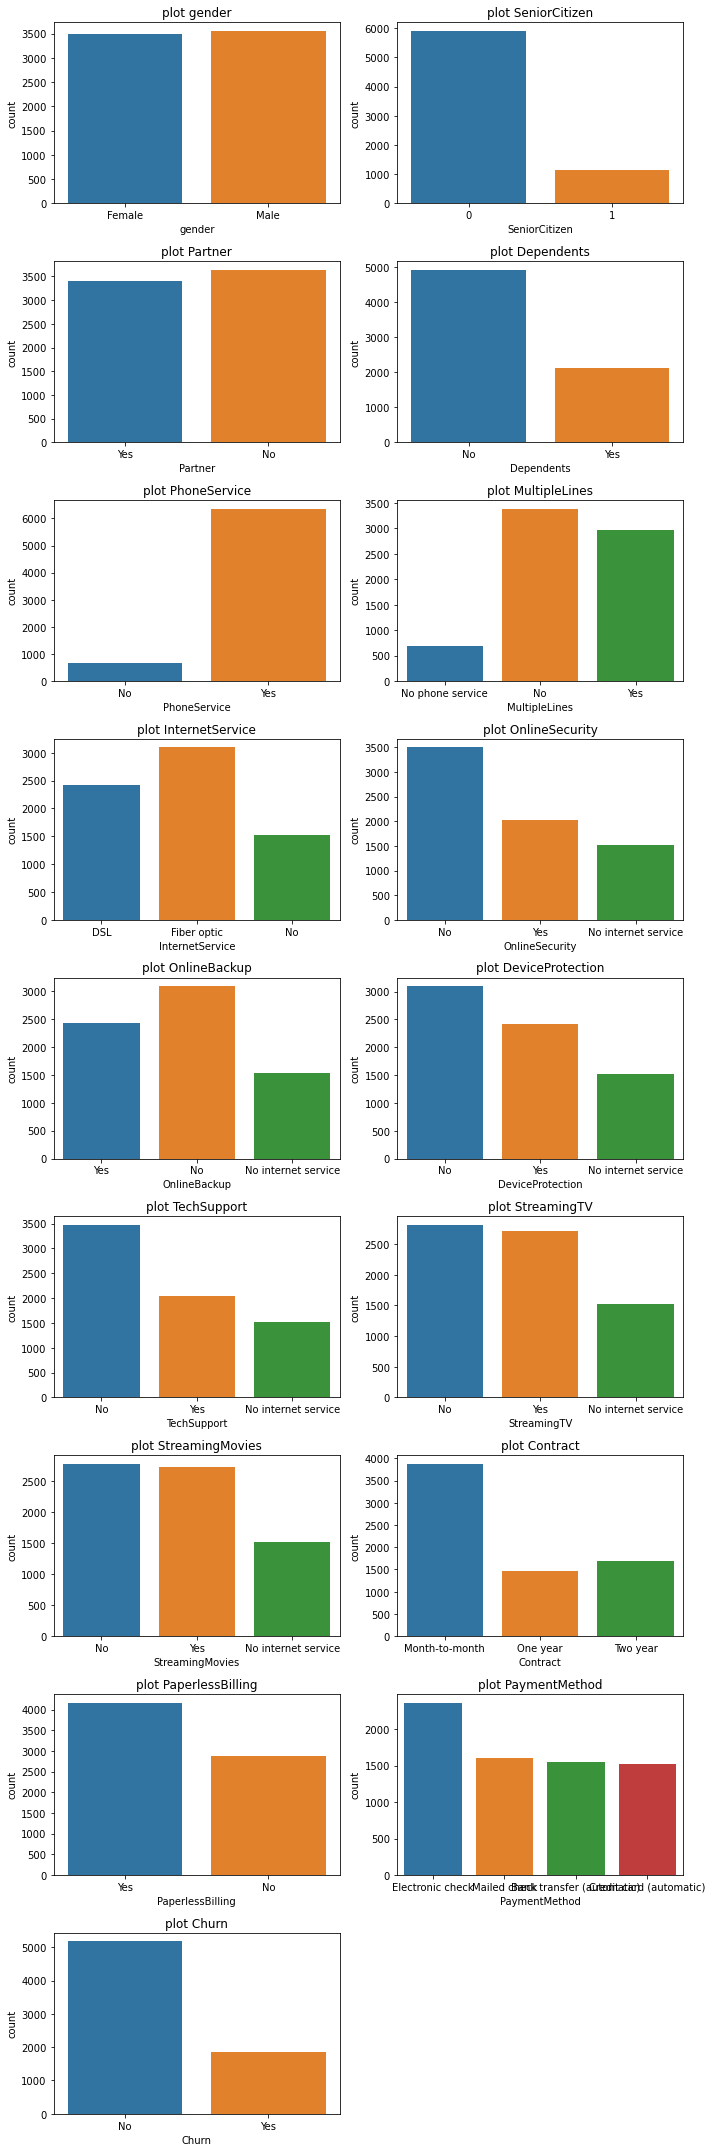

In [16]:
#Visualizing different columns using distplot
ncol,nrow=9,2
ab=df_nominal.columns.values
plt.figure(figsize=(10,30))
for index,i in enumerate(ab):
    ab=plt.subplot(ncol,nrow,index+1)
    sns.countplot(df[i])
    plt.title(f"plot {i}")
    plt.tight_layout()
plt.show()

Observations:

The number of Male and Female customers are almsot equal.

Around 5900 customers are not senior ctizens, but only around 1000 customers are senior citizens.

Around 3400 customers have a partner but more than 3500 customers do not have a partner.

Nearly around 5000 customers do not have any dependents but only around 2100 customers have dependents.

Very less customers around 600 do not have a phone service but more than 6000 customers have a phone service.

Around 3300 customers do not have multiple line service, around 700 have no phone service but around 2850 customers have multiple line service.

3000 customers have fibre optic Internet Service, 2400 have DSL and 1500 have no Internet Service.

3500 customers have no Online Security, 2000 have Online security and 1500 have no Internet Service.

2400 customers have online backup, 3000 have no Online Backup and 1500 have no Internet Service.

3150 customers do noy have any Device Protection, 2350 have Device Protection and 1500 have no Internet Service.

Around 3450 customers have no Tech Support, 2000 have Tech Support and 1500 have no Internet Service.

Around 3000 customers do not have Streaming TV, 2700 have Streaming TV and 1500 have no Internet Service.

Around 2850 customers do not have Streaming Movies, 2750 have Streaming Movies and 1500 have no Internet Service.

3900 customers have a contract on month to month basis, 1500 have an yearly based contract and 1700 have contracts for 2 years.

4200 customers have a Paperless billing and only 2800 customers do not have a Paperless billing.

Around 2400 customers make Payments through electronic check and around 1500 customers make payments via Mail Check, Bank Transfer and Credit Card each.

More than 5000 customer's churn is no, only 1900 customer's churn is Yes.

# Making DataFrame of the Continuous type of Values

Single people are more likly to switch to different network as compared to people who are married/non single

In [17]:
#Copying our continuous data into a new dataframe
df_continuous=df[['tenure','MonthlyCharges', 'TotalCharges']].copy()

In [18]:
#Checking columns of new continuous dataframe created
df_continuous.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [19]:
#Checking shape of nominal data
df_continuous.shape

(7043, 3)

The continuous data consists of 3 columns.

<AxesSubplot:>

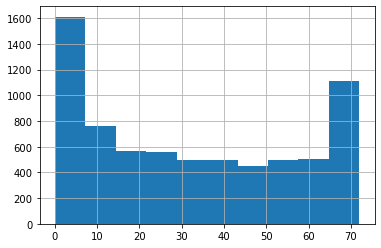

In [20]:
#Univariate Analysis
df['tenure'].hist(grid=True)

Maximum customers have tenure between 0 to 7 and between 65 to 72.

<AxesSubplot:xlabel='MonthlyCharges'>

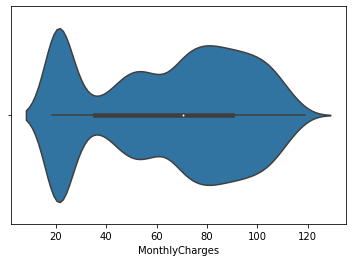

In [21]:
sns.violinplot(x='MonthlyCharges',data=df)

Monthly charges are maximum in the range 15 to 25, less between 40 to 60 again reaches high between 75 to 105.

# Encoding of DataFrame

In [22]:
#Importing library for encoding and creating instance for the same 
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
#Converting object datatype into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
#Verifying Conversion 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0


We can observe that our object datatype has been converted into float values.

# Visualizing Variable TotalCharges

<AxesSubplot:xlabel='TotalCharges'>

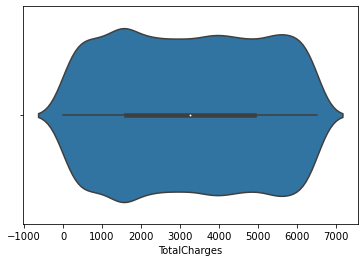

In [25]:
sns.violinplot(x='TotalCharges',data=df)

The values of TotalCharges are in between the range 500 and 6500 constantly.

# Describe Data

In [26]:
#Describing final columns present in dataset
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
#Defining Shape of Dataframe
df.shape

(7043, 20)

In [28]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null 

We have 7043 rows, 20 columns in our dataset with no null values present and the values are in the Float/int data type. Hence, we can move forward with finding correlations in the data.

In [29]:
#Describing mean, median, min, max values of data
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


<AxesSubplot:>

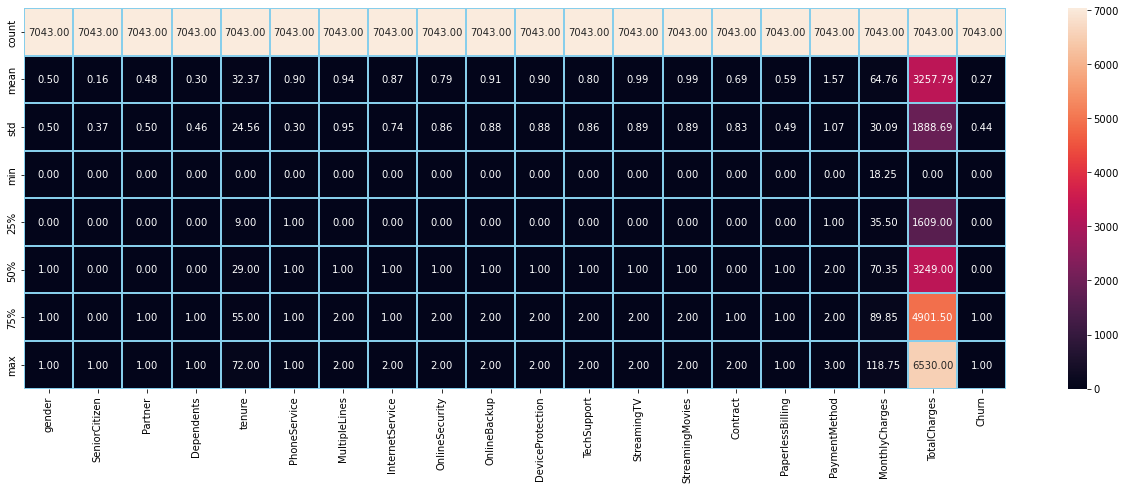

In [30]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor='skyblue',fmt='0.2f')

Observation:

The standard deviation of almost all columns is very less which means that the data is not largely scattered, shows a normal distribution and does not contain skewness.

Only columns tenure, Monthly Charges and Total Charges show high standard deviation.

The values are high only in the Total Charges variable which contains maximum value at 6530 within the column.

As most of our data consists of the string datatype values so we dont see any chance of having outliers in the data.

# Correlation of Columns with the Target Variable

In [31]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


We can observe both positive and negative correlations within the data. Let's visualize these correlations to get a better understanding of data.

<AxesSubplot:>

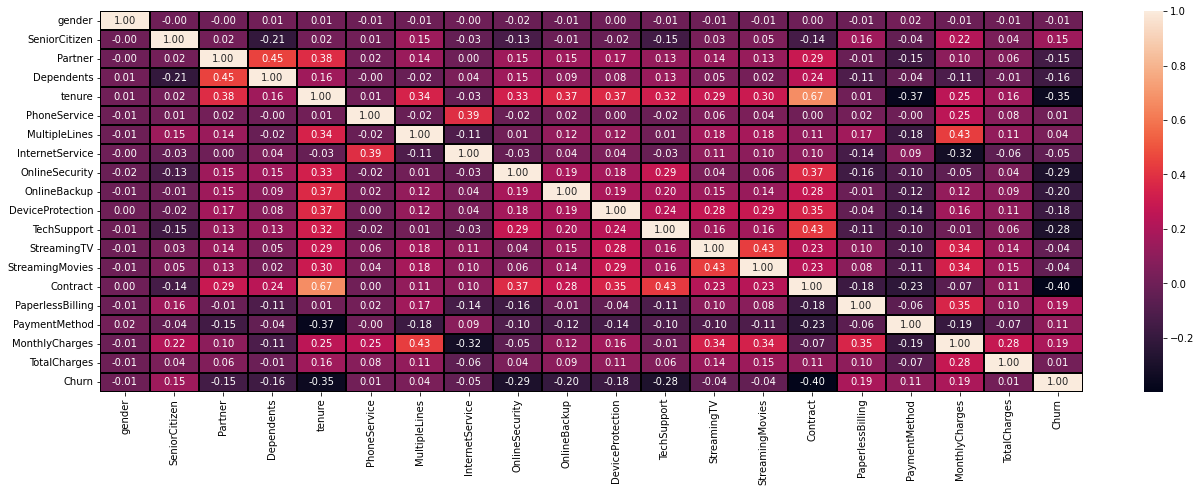

In [32]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observation:

The Target Variable Churn is most positively correlated with variables MonthlyCharges & PaperlessBilling.

The Target Variable Churn is most negatively correlated with variables tenure & Contract.

We can observe that the negative correlations are much more stronger than the positive correlations.

In [33]:
#Sorting correlation in order with the Target Variable
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

The negatively correlated columns with the Target Variable are gender, StreamingTV, StreamingMovies, InternetService, Partner, Dependents, DeviceProtection, OnlineBackup, TechSupport, OnlineSecurity, tenure & Contract.

The positively correlated columns with the Target Variable are MonthlyCharges, PaperlessBilling, SeniorCitizen, PaymentMethod, MultipleLines, TotalCharges & PhoneService.

Most columns are negatively correlated with the Target Variable whereas hardly some are positively correlated.

# Checking Skewness

In [34]:
#Checking Skewness
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see that the variables that are showing skewness in it's values are of the string datatype, hence we don't consider this as skewness present in values.

The continuous type of variables such as tenure, Monthly Charges & Total Charges are not showing any skewness in it's values.

Hence, we don't have skewness present in our data. The data is not skewed so we will not remove the skewness.

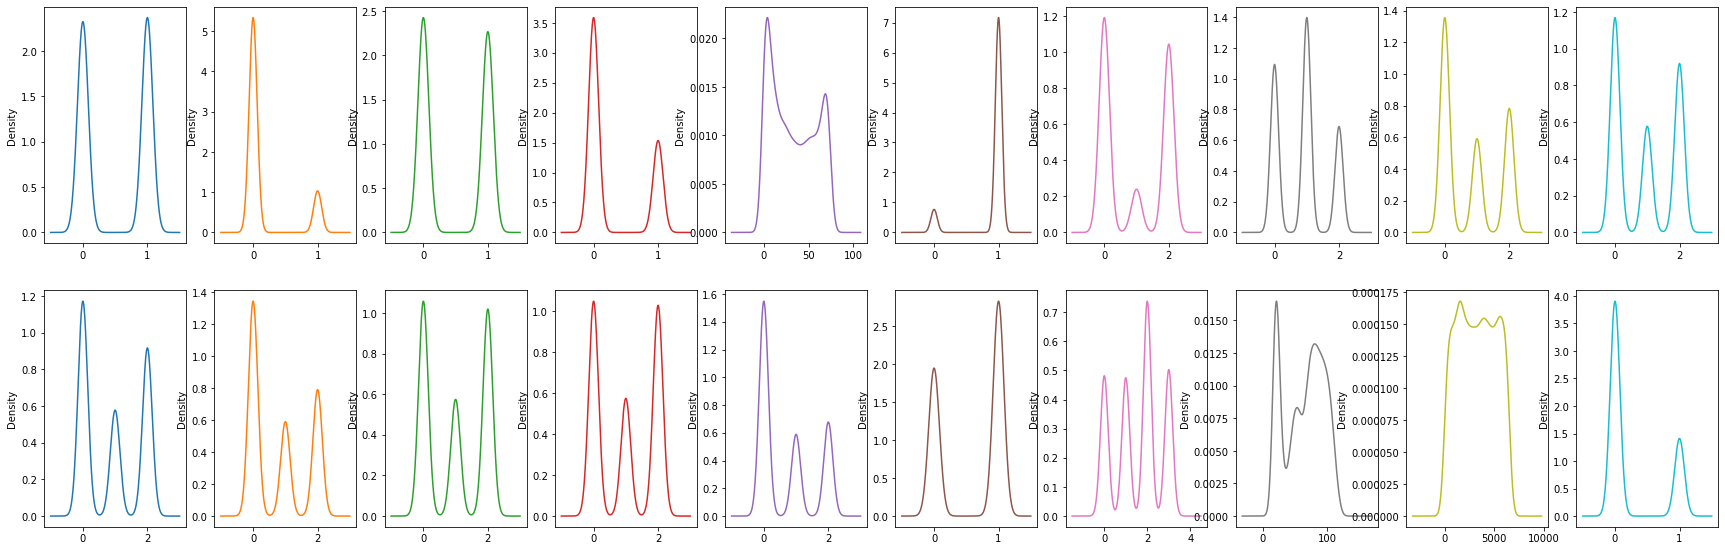

In [35]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

We can see that our data is not showing skewness in any of the columns from the above graph.

# Check Outliers

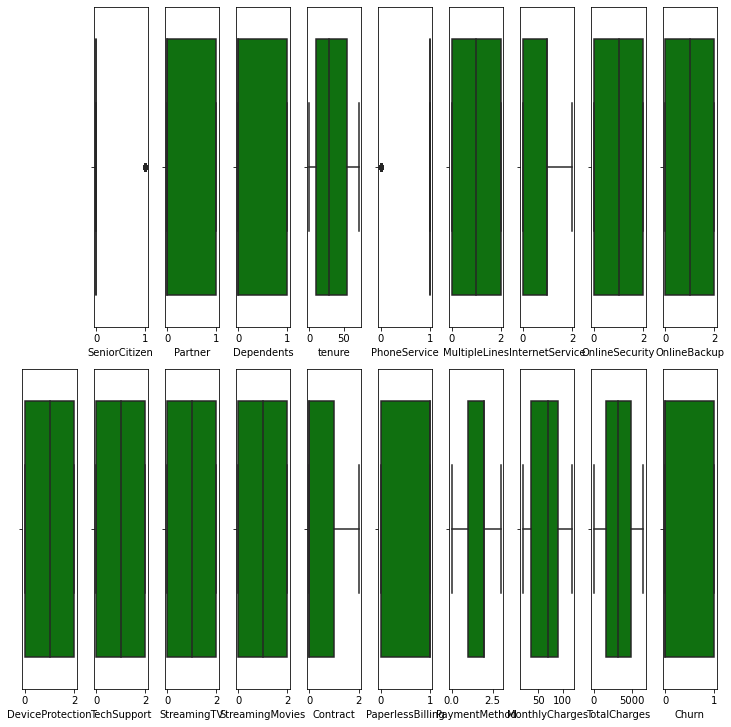

In [36]:
#Visualizing outliers of different variables
collist=df.columns.values
ncol=10
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Since we do not see any outliers present in our dataset, we will proceed forward with training data.

# Separating the column into x & y

In [37]:
#Creating x & y columns 
x=df.drop('Churn',axis=1)
y=df['Churn']

Separating the columns into x & y as input featues and target variable respectively.

# Scaling Data using Min Max Scaler

In [38]:
#Importing libraries for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [39]:
#define min max scaler
mms=MinMaxScaler()

In [40]:
# transform data
ab=mms.fit_transform(df)
print(ab)

[[0.         0.         1.         ... 0.11542289 0.38361409 0.        ]
 [1.         0.         0.         ... 0.38507463 0.2245023  0.        ]
 [1.         0.         0.         ... 0.35422886 0.02404288 1.        ]
 ...
 [0.         0.         1.         ... 0.11293532 0.45849923 0.        ]
 [1.         1.         1.         ... 0.55870647 0.40735069 1.        ]
 [1.         0.         0.         ... 0.86965174 0.8280245  0.        ]]


Since our Target Variable has binary values, we use Classification Algorithms.

# Model Building

In [41]:
#importing Libraries for buiding model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [42]:
#Code for finding best random state
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.8024494142705005
At random state 0, the testing accuracy is: 0.7849538679914834


At random state 1, the training accuracy is: 0.8001419950301739
At random state 1, the testing accuracy is: 0.8048261178140526


At random state 2, the training accuracy is: 0.7996095136670217
At random state 2, the testing accuracy is: 0.8048261178140526


At random state 3, the training accuracy is: 0.7983670571529996
At random state 3, the testing accuracy is: 0.8147622427253371


At random state 4, the training accuracy is: 0.7996095136670217
At random state 4, the testing accuracy is: 0.7750177430801988


At random state 5, the training accuracy is: 0.8004969826056088
At random state 5, the testing accuracy is: 0.7955997161107168


At random state 6, the training accuracy is: 0.7939297124600639
At random state 6, the testing accuracy is: 0.8005677785663591


At random state 7, the training accuracy is: 0.7994320198793042
At random state 7, the testing ac

At random state 64, the training accuracy is: 0.7948171813986511
At random state 64, the testing accuracy is: 0.7970191625266146


At random state 65, the training accuracy is: 0.8022719204827831
At random state 65, the testing accuracy is: 0.7955997161107168


At random state 66, the training accuracy is: 0.7967696130635428
At random state 66, the testing accuracy is: 0.7842441447835344


At random state 67, the training accuracy is: 0.7953496627618033
At random state 67, the testing accuracy is: 0.7955997161107168


At random state 68, the training accuracy is: 0.7944621938232161
At random state 68, the testing accuracy is: 0.8076650106458482


At random state 69, the training accuracy is: 0.7983670571529996
At random state 69, the testing accuracy is: 0.808374733853797


At random state 70, the training accuracy is: 0.8020944266950657
At random state 70, the testing accuracy is: 0.78708303761533


At random state 71, the training accuracy is: 0.8004969826056088
At random state 71, t

At random state 128, the training accuracy is: 0.7971246006389776
At random state 128, the testing accuracy is: 0.7955997161107168


At random state 129, the training accuracy is: 0.7907348242811502
At random state 129, the testing accuracy is: 0.8112136266855926


At random state 130, the training accuracy is: 0.8044018459353922
At random state 130, the testing accuracy is: 0.7920511000709723


At random state 131, the training accuracy is: 0.8033368832090877
At random state 131, the testing accuracy is: 0.794180269694819


At random state 132, the training accuracy is: 0.8020944266950657
At random state 132, the testing accuracy is: 0.8005677785663591


At random state 133, the training accuracy is: 0.8008519701810437
At random state 133, the testing accuracy is: 0.7863733144073811


At random state 134, the training accuracy is: 0.8024494142705005
At random state 134, the testing accuracy is: 0.794889992902768


At random state 135, the training accuracy is: 0.8031593894213702
At ra

At random state 190, the training accuracy is: 0.8019169329073482
At random state 190, the testing accuracy is: 0.7970191625266146


At random state 191, the training accuracy is: 0.8003194888178914
At random state 191, the testing accuracy is: 0.8034066713981547


At random state 192, the training accuracy is: 0.7944621938232161
At random state 192, the testing accuracy is: 0.801277501774308


At random state 193, the training accuracy is: 0.7992545260915868
At random state 193, the testing accuracy is: 0.7998580553584103


At random state 194, the training accuracy is: 0.80386936457224
At random state 194, the testing accuracy is: 0.7920511000709723


At random state 195, the training accuracy is: 0.8020944266950657
At random state 195, the testing accuracy is: 0.8076650106458482


At random state 196, the training accuracy is: 0.7980120695775648
At random state 196, the testing accuracy is: 0.7885024840312278


At random state 197, the training accuracy is: 0.8036918707845225
At ran

We are getting best testing accuracy as 82.61% and training accuracy as 80.17% on random state 92. Hence, we select random state as 92.

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=92)

In [44]:
model=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),SVC()]

In [45]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.807741935483871
[[1024  116]
 [ 182  228]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1140
         1.0       0.66      0.56      0.60       410

    accuracy                           0.81      1550
   macro avg       0.76      0.73      0.74      1550
weighted avg       0.80      0.81      0.80      1550



Accuracy score of GaussianNB() is:
0.7664516129032258
[[890 250]
 [112 298]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1140
         1.0       0.54      0.73      0.62       410

    accuracy                           0.77      1550
   macro avg       0.72      0.75      0.73      1550
weighted avg       0.80      0.77      0.78      1550



Accuracy score of KNeighborsClassifier() is:
0.7483870967741936
[[989 151]
 [239 171]]
              precision    recall  f1-score   support

         0.0       0.81      0.87  

We get accuracy 80.77% for Logistic Regression, 76.64% for GaussianNB, 74.83% for KNeighborsClassifier and 73.54% for SVC.



# Cross Validation of the Model

In [46]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.799659090964072 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 3 the cv score is 0.8013636120585511 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 4 the cv score is 0.7969626793918745 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 5 the cv score is 0.7995184165107426 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 6 the cv score is 0.8002280634743589 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 7 the cv score is 0.7999434235839044 and r2 score for training is 0.799016930638995 and accuracy for the testing is 0.8219354838709677


At cross fold 8 the cv score is 0.7989513466102569 and r2 score for training is 0.7990169306389

cv=3 gives us the best cv score at 80.13% for Logistic Regression.

In [46]:
for m in model:
    cv_score=cross_val_score(m,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("Cross Validation score of ",m," model: ",cv_score.mean())
    print('\n')
    print('\n')

Cross Validation score of  LogisticRegression()  model:  0.8010814854010903




Cross Validation score of  GaussianNB()  model:  0.7559250512724757




Cross Validation score of  KNeighborsClassifier()  model:  0.7513813899150642




Cross Validation score of  SVC()  model:  0.7346303246343422






The cross Validation score for Logistic Regression is 80.10%, GaussianNB is 75.59, KNeighborsClassifier is 75.13 and SVC is 73.46.

# Ensemble Techniques

In [47]:
#importing libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC()

In [48]:
#Create adaboost classifier object
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC())

In [49]:
#printing accuracy metrics
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7354838709677419
[[1140    0]
 [ 410    0]]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1140
         1.0       0.00      0.00      0.00       410

    accuracy                           0.74      1550
   macro avg       0.37      0.50      0.42      1550
weighted avg       0.54      0.74      0.62      1550



# Creating Confusion Matrix


In [50]:
#Importing Libraries to create confusion matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [51]:
#Creating confusion matrix
svc=SVC()

score=cross_val_score(svc,x,y,cv=3)
print("Score:",score)

print("Mean Scores",score.mean())
print("Standard deviation",score.std())

y_pred=cross_val_predict(svc,x,y,cv=3)

print('Y Prediction values ')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.7346678  0.7346678  0.73455475]
Mean Scores 0.7346301185052165
Standard deviation 5.329305388459198e-05
Y Prediction values 
[0. 0. 0. ... 0. 0. 0.]


array([[5174,    0],
       [1869,    0]], dtype=int64)